In [21]:
pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 2.1 MB/s eta 0:00:01     |████████████████▌               | 4.0 MB 2.1 MB/s eta 0:00:02
     |████████████████████████████████| 294 kB 35.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 26.8 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 40.7 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 10.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import os

file_path = "/Users/madisonmariani/Desktop/DS 325/SDOH_2020_COUNTY_1_0.xlsx"

df = pd.read_excel(file_path, sheet_name='Data')
print(df.head())

   YEAR  COUNTYFIPS  STATEFIPS    STATE          COUNTY REGION  TERRITORY  \
0  2020        1001          1  Alabama  Autauga County  South          0   
1  2020        1003          1  Alabama  Baldwin County  South          0   
2  2020        1005          1  Alabama  Barbour County  South          0   
3  2020        1007          1  Alabama     Bibb County  South          0   
4  2020        1009          1  Alabama   Blount County  South          0   

   ACS_TOT_POP_WT  ACS_TOT_POP_US_ABOVE1  ACS_TOT_POP_ABOVE5  ...  \
0         55639.0                54929.0             52404.0  ...   
1        218289.0               216518.0            206329.0  ...   
2         25026.0                24792.0             23694.0  ...   
3         22374.0                22073.0             21121.0  ...   
4         57755.0                57164.0             54250.0  ...   

   POS_TOT_HOSP_AMBULANCE  POS_HOSP_AMBULANCE_RATE  POS_TOT_HOSP_CHEMO  \
0                     0.0                     0.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.columns)

Index(['YEAR', 'COUNTYFIPS', 'STATEFIPS', 'STATE', 'COUNTY', 'REGION',
       'TERRITORY', 'ACS_TOT_POP_WT', 'ACS_TOT_POP_US_ABOVE1',
       'ACS_TOT_POP_ABOVE5',
       ...
       'POS_TOT_HOSP_AMBULANCE', 'POS_HOSP_AMBULANCE_RATE',
       'POS_TOT_HOSP_CHEMO', 'POS_HOSP_CHEMO_RATE', 'POS_TOT_HOSP_ED',
       'POS_HOSP_ED_RATE', 'POS_PCT_HOSP_FOR_PROFIT',
       'POS_PCT_HOSP_NON_PROFIT', 'POS_PCT_HOSP_GOV', 'CEN_AIAN_NH_IND'],
      dtype='object', length=682)


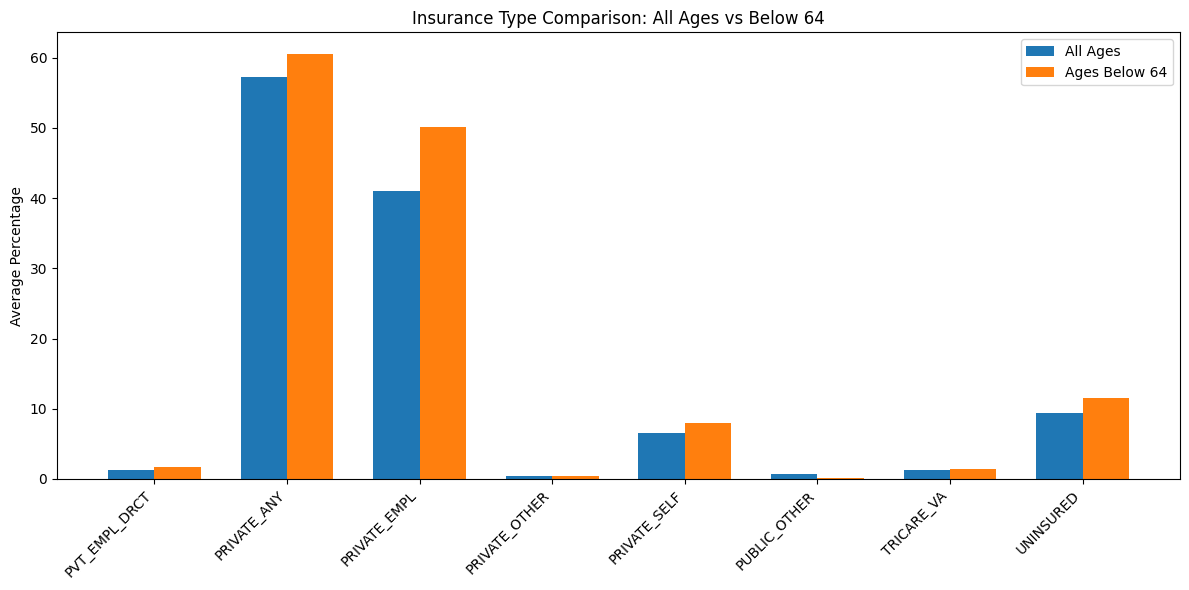

In [9]:
group_cols = [
    ('ACS_PCT_PVT_EMPL_DRCT', 'ACS_PCT_PVT_EMPL_DRCT_BELOW64'),
    ('ACS_PCT_PRIVATE_ANY', 'ACS_PCT_PRIVATE_ANY_BELOW64'),
    ('ACS_PCT_PRIVATE_EMPL', 'ACS_PCT_PRIVATE_EMPL_BELOW64'),
    ('ACS_PCT_PRIVATE_OTHER', 'ACS_PCT_PRIVATE_OTHER_BELOW64'),
    ('ACS_PCT_PRIVATE_SELF', 'ACS_PCT_PRIVATE_SELF_BELOW64'),
    ('ACS_PCT_PUBLIC_OTHER', 'ACS_PCT_PUBLIC_OTHER_BELOW64'),
    ('ACS_PCT_TRICARE_VA', 'ACS_PCT_TRICARE_VA_BELOW64'),
    ('ACS_PCT_UNINSURED', 'ACS_PCT_UNINSURED_BELOW64')
]

labels = [col[0].replace("ACS_PCT_", "").replace("_BELOW64", "") for col in group_cols]
general = [df[col[0]].mean() for col in group_cols]
below64 = [df[col[1]].mean() for col in group_cols]

x = range(len(group_cols))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x, general, width=width, label='All Ages')
plt.bar([p + width for p in x], below64, width=width, label='Ages Below 64')
plt.xticks([p + width / 2 for p in x], labels, rotation=45, ha='right')
plt.title('Insurance Type Comparison: All Ages vs Below 64')
plt.ylabel('Average Percentage')
plt.legend()
plt.tight_layout()
plt.show()


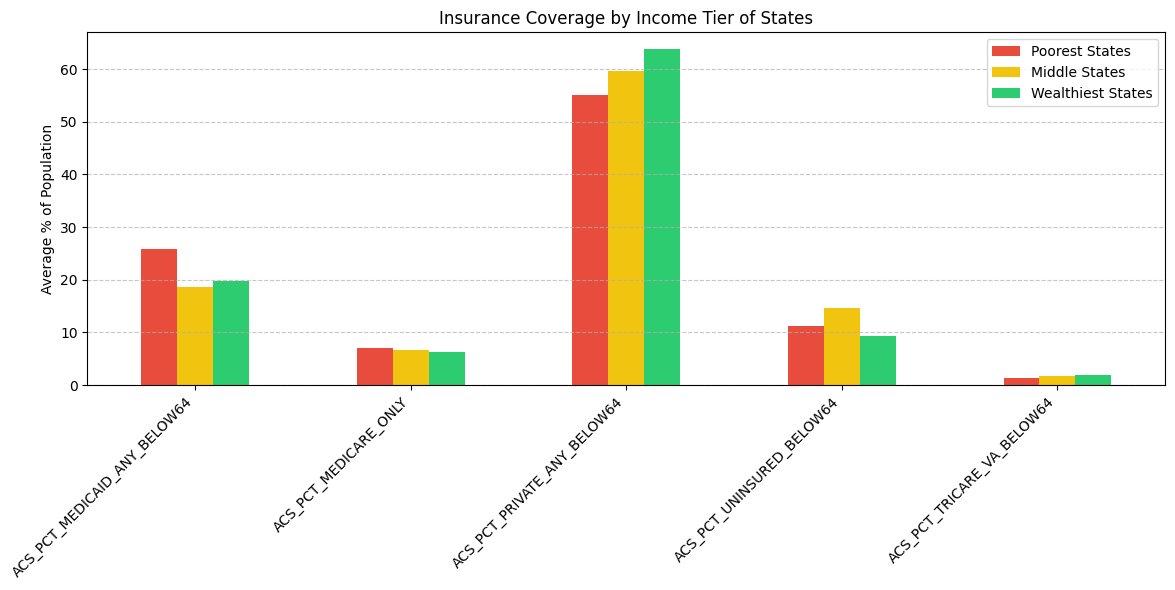

In [14]:
wealthiest_states = [
    "Maryland", "New Jersey", "Massachusetts", "Hawaii", "California",
    "Connecticut", "Washington", "New Hampshire", "Colorado", "Virginia"
]

middle_states = [
    "Missouri", "Montana", "Georgia", "North Carolina", "Florida",
    "Texas", "Wisconsin", "Michigan", "Nevada", "Iowa"
]
poorest_states = [
    "Mississippi", "West Virginia", "Arkansas", "Louisiana", "New Mexico",
    "Alabama", "Kentucky", "Oklahoma", "South Carolina", "Indiana"
]

insurance_cols = [
    'ACS_PCT_MEDICAID_ANY_BELOW64', 'ACS_PCT_MEDICARE_ONLY',
    'ACS_PCT_PRIVATE_ANY_BELOW64', 'ACS_PCT_UNINSURED_BELOW64',
    'ACS_PCT_TRICARE_VA_BELOW64'
]

df_poorest = df[df['STATE'].isin(poorest_states)]
df_middle = df[df['STATE'].isin(middle_states)]
df_wealthiest = df[df['STATE'].isin(wealthiest_states)]

poorest_avg = df_poorest[insurance_cols].mean()
middle_avg = df_middle[insurance_cols].mean()
wealthiest_avg = df_wealthiest[insurance_cols].mean()

compare_df = pd.DataFrame({
    'Poorest States': poorest_avg,
    'Middle States': middle_avg,
    'Wealthiest States': wealthiest_avg
})

compare_df.plot(kind='bar', figsize=(12, 6), color=['#e74c3c', '#f1c40f', '#2ecc71'])
plt.title('Insurance Coverage by Income Tier of States')
plt.ylabel('Average % of Population')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 5000x1000 with 0 Axes>

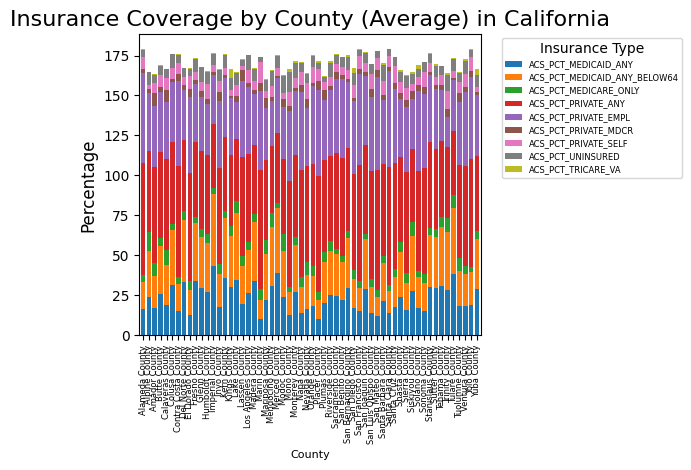

In [ ]:
df_california = df[df['STATE'] == "California"]

insurance_columns = [
    'ACS_PCT_MEDICAID_ANY', 'ACS_PCT_MEDICAID_ANY_BELOW64', 'ACS_PCT_MEDICARE_ONLY', 
    'ACS_PCT_PRIVATE_ANY', 'ACS_PCT_PRIVATE_EMPL', 'ACS_PCT_PRIVATE_MDCR', 
    'ACS_PCT_PRIVATE_SELF', 'ACS_PCT_UNINSURED', 'ACS_PCT_TRICARE_VA'
]

df_california_insurance = df_california[['COUNTY'] + insurance_columns]

df_county_averages = df_california_insurance.groupby('COUNTY').mean()

plt.figure(figsize=(50, 10))  
ax = df_county_averages[insurance_columns].plot(kind='bar', stacked=True, width=0.8)

plt.title('Insurance Coverage by County (Average) in California', fontsize=16)
plt.xlabel('County', fontsize=8)
plt.ylabel('Percentage', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)

plt.legend(title='Insurance Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=6)

plt.tight_layout()
plt.show()
